In [1]:
import os
os.chdir("C:\\Users\\Lenovo\\Desktop\\New folder\\LetsUpgrade_Python_Aug\\KNN")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("Classified Data", index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [30]:
len(df)

1000

In [ ]:
# TARGET CLASS - Dependent variables
# Rest are independent variables

In [9]:
# any will give boolean value and sum will give count
#df.isnull().any()
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [8]:
df['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
print(x.head())
print(y.head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  
0  0.643798  0.879422  1.231409  
1  1.013546  0.621552  1.492702  
2  1.154483  0.957877  1.285597  
3  1.380003  1.522692  1.153093  
4  0.646691  1.463812  1.419167  
0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64


In [ ]:
# split the data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75,random_state=1)

# KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       371
           1       0.95      0.97      0.96       379

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       129
           1       0.93      0.93      0.93       121

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [20]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[350  21]
 [ 12 367]]
[[121   8]
 [  8 113]]


In [21]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.956
0.936


# Find best k value (HyperParam)

In [23]:
error =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

In [24]:
error

[0.084,
 0.076,
 0.068,
 0.068,
 0.064,
 0.064,
 0.064,
 0.072,
 0.072,
 0.06,
 0.06,
 0.052,
 0.048,
 0.052,
 0.048,
 0.052,
 0.056,
 0.052,
 0.052,
 0.048,
 0.044,
 0.052,
 0.052,
 0.048,
 0.048,
 0.044,
 0.048,
 0.048,
 0.056,
 0.048,
 0.056,
 0.052,
 0.052,
 0.052,
 0.056,
 0.048,
 0.056,
 0.048,
 0.052]

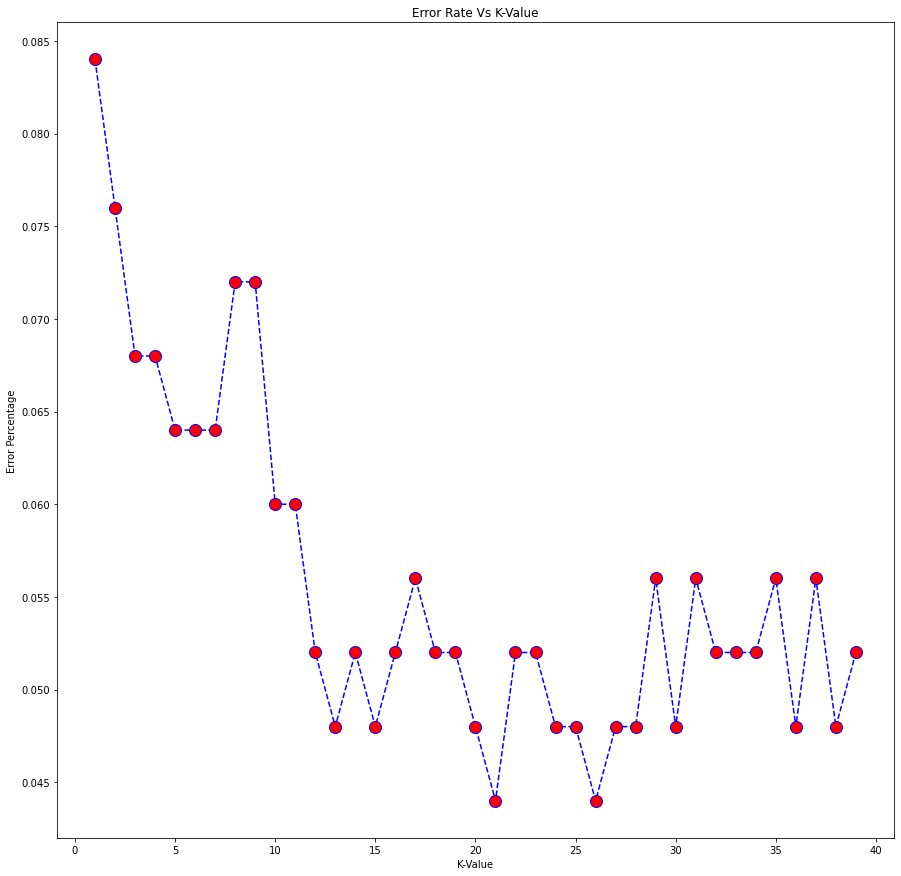

In [26]:
plt.figure(figsize=(15,15))
plt.plot(range(1,40), error, color='blue', linestyle='dashed',
        marker='o', markersize=12, markerfacecolor = "red" )
plt.title("Error Rate Vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Percentage")
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [28]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [29]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9373333333333334
0.956


# Support Vector Machine

In [32]:
# Support Vector Machine
# Kernel = approach

from sklearn.svm import SVC

In [34]:
svm_linear = SVC(kernel='linear', random_state=1,C=1.0 )
svm_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [35]:
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

In [36]:
print(accuracy_score(y_train, y_pred_train_linear))
print(accuracy_score(y_test, y_pred_test_linear))

0.9493333333333334
0.96


In [37]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=1,C=1.0 )
svm_sigmoid.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=1)

In [38]:
y_pred_train_sigmoid = svm_sigmoid.predict(x_train)
y_pred_test_sigmoid = svm_sigmoid.predict(x_test)

In [39]:
print(accuracy_score(y_train, y_pred_train_sigmoid))
print(accuracy_score(y_test, y_pred_test_sigmoid))

0.5053333333333333
0.484


In [40]:
svm_poly = SVC(kernel='poly', random_state=1,C=1.0 )
svm_poly.fit(x_train, y_train)

SVC(kernel='poly', random_state=1)

In [41]:
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)

In [42]:
print(accuracy_score(y_train, y_pred_train_poly))
print(accuracy_score(y_test, y_pred_test_poly))

0.9706666666666667
0.916


In [43]:
svm_rbf = SVC(kernel='rbf', random_state=1,C=1.0 )
svm_rbf.fit(x_train, y_train)

SVC(random_state=1)

In [44]:
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [45]:
print(accuracy_score(y_train, y_pred_train_rbf))
print(accuracy_score(y_test, y_pred_test_rbf))

0.956
0.956


# Naive Bayes Theorem

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [48]:
y_pred_train_nb = naive.predict(x_train)
y_pred_test_nb = naive.predict(x_test)

In [49]:
print(accuracy_score(y_train, y_pred_train_nb))
print(accuracy_score(y_test, y_pred_test_nb))

0.9386666666666666
0.96
